In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
parent_dir = "transfer_learning_noes/"

In [3]:
train_data = pd.read_csv(parent_dir+"/train_data_seed49.csv", index_col=["timestamp", "num"], parse_dates=["timestamp"])
test_data = pd.read_csv(parent_dir+"/test_data_seed49.csv", index_col=["timestamp", "num"], parse_dates=["timestamp"])
ae_history = pd.read_csv(parent_dir+"/autoencoder_history.csv", index_col=0)
unet_history = pd.read_csv(parent_dir+"/unet_history.csv", index_col=0)
unet_only_history = pd.read_csv(parent_dir+"/unet_only_history.csv", index_col=0)

In [4]:
unet_history

,loss,sparse_top_k_categorical_accuracy,sparse_categorical_crossentropy,val_loss,val_sparse_top_k_categorical_accuracy,val_sparse_categorical_crossentropy
0,1.259633,0.465752,1.259632,1.245239,0.480529,1.244576
1,1.232927,0.482325,1.232927,1.250479,0.459437,1.252172
2,1.231198,0.482011,1.231198,1.241586,0.489616,1.239913
3,1.227984,0.485731,1.227986,1.231157,0.486776,1.229869
4,1.224338,0.488694,1.224337,1.212211,0.494779,1.213786
5,1.223337,0.488256,1.223338,1.216033,0.488038,1.216860
6,1.223288,0.489810,1.223288,1.217645,0.482681,1.215940
7,1.219050,0.491931,1.219051,1.219965,0.486409,1.220109
8,1.217434,0.492955,1.217434,1.231611,0.494672,1.230179
9,1.216147,0.494409,1.216147,1.210863,0.493755,1.211177


In [5]:
epoch = range(1, 31)

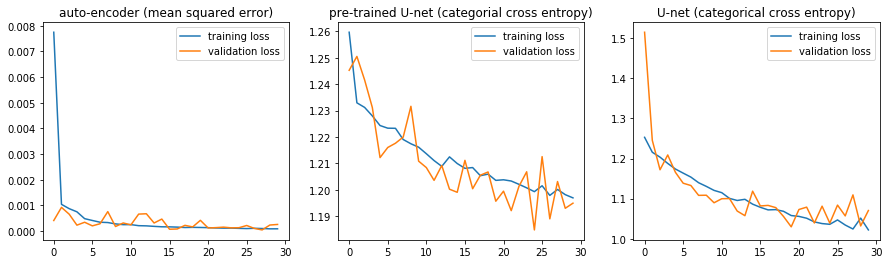

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax[0].plot(ae_history.loss, label='training loss')
ax[0].set_title("auto-encoder (mean squared error)")
ax[0].plot(ae_history.val_loss, label='validation loss')
ax[0].legend( loc='upper right')

ax[1].plot(unet_history.loss, label='training loss')
ax[1].set_title("pre-trained U-net (categorial cross entropy)")
ax[1].plot(unet_history.val_loss, label='validation loss')
ax[1].legend( loc='upper right')

ax[2].plot(unet_only_history.loss, label='training loss')
ax[2].set_title("U-net (categorical cross entropy)")
ax[2].plot(unet_only_history.val_loss, label='validation loss')
ax[2].legend( loc='upper right')

plt.savefig("loss_fig/loss_val-loss.png", dpi=150)

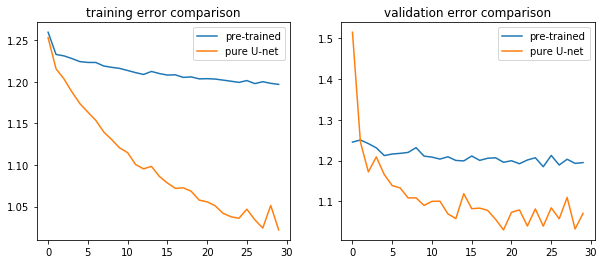

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].plot(unet_history.loss, label='pre-trained')
ax[0].set_title("training error comparison")
ax[0].plot(unet_only_history.loss, label='pure U-net')
ax[0].legend( loc='upper right')

ax[1].plot(unet_history.val_loss, label='pre-trained')
ax[1].set_title("validation error comparison")
ax[1].plot(unet_only_history.val_loss, label='pure U-net')
ax[1].legend( loc='upper right')

plt.savefig("loss_fig/loss_comparison.png", dpi=150)

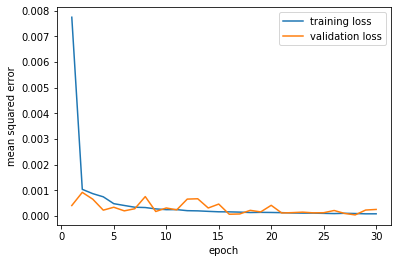

In [16]:
plt.plot(epoch, ae_history.loss, label='training loss')
plt.plot(epoch, ae_history.val_loss, label='validation loss')
plt.xlabel("epoch")
plt.ylabel("mean squared error")
plt.legend( loc='upper right')
plt.savefig("loss_fig/ae_loss.png", dpi=150)

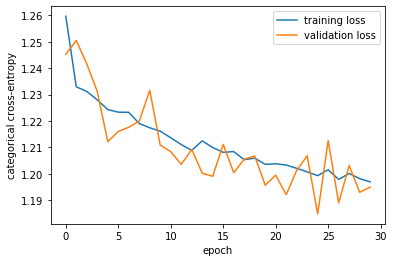

In [7]:
plt.plot(unet_history.loss, label='training loss')
plt.plot(unet_history.val_loss, label='validation loss')
plt.xlabel("epoch")
plt.ylabel("categorical cross-entropy")
plt.legend( loc='upper right')
plt.savefig("loss_fig/unet_loss.png", dpi=150)

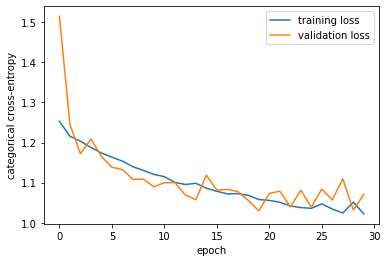

In [8]:
plt.plot(unet_only_history.loss, label='training loss')
plt.plot(unet_only_history.val_loss, label='validation loss')
plt.xlabel("epoch")
plt.ylabel("categorical cross-entropy")
plt.legend( loc='upper right')
plt.savefig("loss_fig/unet_only_loss.png", dpi=150)

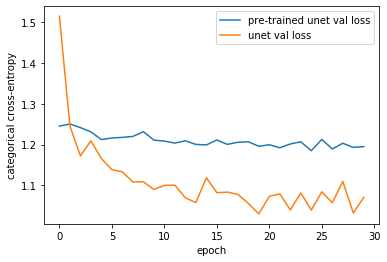

In [10]:
plt.plot(unet_history.val_loss, label="pre-trained unet val loss")
plt.plot(unet_only_history.val_loss, label="unet val loss")
plt.xlabel("epoch")
plt.ylabel("categorical cross-entropy")
plt.legend( loc='upper right')
plt.savefig("loss_fig/compare_val_loss.png", dpi=150)

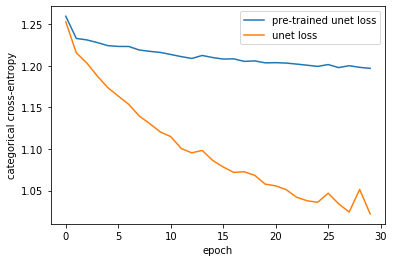

In [11]:
plt.plot(unet_history.loss, label="pre-trained unet loss")
plt.plot(unet_only_history.loss, label="unet loss")
plt.xlabel("epoch")
plt.ylabel("categorical cross-entropy")
plt.legend( loc='upper right')
plt.savefig("loss_fig/compare_loss.png", dpi=150)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].plot(ae_history.loss, label='training loss')
ax[0].set_title("auto-encoder (mean squared error)")
ax[0].plot(ae_history.val_loss, label='validation loss')
ax[0].legend( loc='upper right')

ax[1].plot(unet_history.loss, label='training loss')
ax[1].set_title("pre-trained U-net (categorial cross entropy)")
ax[1].plot(unet_history.val_loss, label='validation loss')
ax[1].legend( loc='upper right')

ax[2].plot(unet_only_history.loss, label='training loss')
ax[2].set_title("U-net (categorical cross entropy)")
ax[2].plot(unet_only_history.val_loss, label='validation loss')
ax[2].legend( loc='upper right')

plt.savefig("loss_fig/loss_val-loss.png", dpi=150)